In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

from pathlib import Path

In [17]:
fields = [
    "seq", "cam", "model", "purge", "idf1", "idp", "idr", "recall", "precision",
    "num_unique_objects", "mostly_tracked", "partially_tracked", "mostly_lost",
    "num_false_positives", "num_misses", "num_switches", "num_fragmentations",
    "mota", "motp", "num_transfer", "num_ascend", "num_migrate"
]

,seq,cam,model,purge,idf1,idp,idr,recall,precision,num_unique_objects,...,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp,num_transfer,num_ascend,num_migrate


In [25]:
def test_results(seq):
    full_dataframe = pd.DataFrame(
        columns=fields
    )
    root_result_path = Path("./results")
    cam_re = re.compile("(c[0-9]+)")
    
    sequence_path = root_result_path / f"train_models_test{seq}"
    
    for model_path in sequence_path.glob("*"):
        model = model_path.parts[-1]
        for camera in model_path.glob("ai_cities*"):
            cam = cam_re.search(camera.parts[-1]).group(0)
    
            not_purging = pd.read_csv(camera / "summary.csv")
            purging = pd.read_csv(camera / "summary_purge.csv")
    
            not_purging[["seq", "cam", "model", "purge"]] = [seq, cam, model, False]
            purging[["seq", "cam", "model", "purge"]] = [seq, cam, model, True]
            full_dataframe = pd.concat([full_dataframe, purging, not_purging])
    return full_dataframe

In [29]:
test_s03 = test_results("S03")
test_s01 = test_results("S01")
test_s04 = test_results("S04")

In [27]:
test_s03

,seq,cam,model,purge,idf1,idp,idr,recall,precision,num_unique_objects,...,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp,num_transfer,num_ascend,num_migrate,Unnamed: 0
0,S03,c014,faster_c4,True,0.825138,0.740835,0.93109,0.969551,0.771438,14,...,717,76,1,0,0.681891,0.112668,0,1,0,acc
0,S03,c014,faster_c4,False,0.522429,0.354945,0.989183,1.0,0.358827,14,...,4460,0,4,0,-0.788462,0.117488,0,4,0,acc
0,S03,c011,faster_c4,True,0.913212,0.907692,0.918799,0.955506,0.943956,17,...,51,40,2,1,0.896552,0.144506,1,2,1,acc
0,S03,c011,faster_c4,False,0.745626,0.624812,0.92436,0.994438,0.67218,17,...,436,5,7,1,0.501669,0.170308,0,7,0,acc
0,S03,c015,faster_c4,True,1.0,1.0,1.0,1.0,1.0,1,...,0,0,0,0,1.0,0.143285,0,0,0,acc
0,S03,c015,faster_c4,False,0.326923,0.195402,1.0,1.0,0.195402,1,...,70,0,0,0,-3.117647,0.143285,0,0,0,acc
0,S03,c010,faster_c4,True,0.966918,0.935956,1.0,1.0,0.935956,14,...,127,0,0,0,0.931573,0.098362,0,0,0,acc
0,S03,c010,faster_c4,False,0.552463,0.381657,1.0,1.0,0.381657,14,...,3007,0,0,0,-0.620151,0.098362,0,0,0,acc
0,S03,c012,faster_c4,True,0.0,NaN,0.0,0.0,NaN,17,...,0,153,0,0,0.0,NaN,0,0,0,acc
0,S03,c012,faster_c4,False,0.349315,0.211618,1.0,1.0,0.211618,17,...,570,0,5,0,-2.75817,0.127804,0,5,0,acc


In [28]:
test_s01

,seq,cam,model,purge,idf1,idp,idr,recall,precision,num_unique_objects,...,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp,num_transfer,num_ascend,num_migrate,Unnamed: 0
0,S01,c003,faster_c4,True,0.718969,0.773208,0.67184,0.735757,0.846769,82,...,652,1294,28,18,0.596896,0.425868,37,11,20,acc
0,S01,c003,faster_c4,False,0.652939,0.532013,0.845007,0.99367,0.625611,82,...,2912,31,69,6,0.38493,0.284246,11,61,3,acc
0,S01,c001,faster_c4,True,0.700722,0.748265,0.658859,0.735574,0.835389,77,...,427,779,15,16,0.58554,0.312845,24,10,19,acc
0,S01,c001,faster_c4,False,0.627229,0.537864,0.752206,0.994569,0.711165,77,...,1190,16,229,10,0.512899,0.174534,5,227,4,acc
0,S01,c005,faster_c4,True,0.595813,0.56787,0.626648,0.772791,0.700305,94,...,1179,810,37,15,0.431697,0.634189,50,19,32,acc
0,S01,c005,faster_c4,False,0.553725,0.402677,0.886115,0.997756,0.45341,94,...,4288,8,286,1,-0.285273,0.50086,16,278,8,acc
0,S01,c002,faster_c4,True,0.688337,0.628723,0.760441,0.873566,0.722254,74,...,1464,551,18,7,0.533502,0.25014,21,13,16,acc
0,S01,c002,faster_c4,False,0.650951,0.520716,0.868059,0.997476,0.598348,74,...,2918,11,136,4,0.296696,0.161497,5,133,2,acc
0,S01,c004,faster_c4,True,0.810551,0.741952,0.893128,0.94147,0.782111,80,...,1313,293,24,16,0.674391,0.341075,32,10,18,acc
0,S01,c004,faster_c4,False,0.77214,0.668665,0.913504,0.985018,0.721012,80,...,1908,75,31,16,0.597683,0.205863,10,27,6,acc


In [30]:
test_s04

,seq,cam,model,purge,idf1,idp,idr,recall,precision,num_unique_objects,...,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp,num_transfer,num_ascend,num_migrate,Unnamed: 0
0,S04,c019,faster_c4,True,0.879056,0.986755,0.792553,0.803191,1.0,8,...,0,74,0,2,0.803191,0.113179,2,0,2,acc
0,S04,c019,faster_c4,False,0.87062,0.882514,0.859043,0.864362,0.887978,8,...,41,51,1,0,0.75266,0.093233,0,1,0,acc
0,S04,c021,faster_c4,True,0.989011,0.986842,0.991189,0.991189,0.986842,6,...,6,4,0,0,0.977974,0.111473,0,0,0,acc
0,S04,c021,faster_c4,False,0.374124,0.230106,1.0,1.0,0.230106,6,...,1519,0,2,0,-2.35022,0.20282,0,2,0,acc
0,S04,c038,faster_c4,True,0.806164,0.810767,0.801613,0.840323,0.849918,19,...,92,99,5,4,0.683871,0.341,9,1,5,acc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,S04,c034,faster_fpn,False,0.526094,0.447333,0.638516,0.988484,0.692515,20,...,686,18,69,11,0.505438,0.39893,16,54,2,acc
0,S04,c022,faster_fpn,True,0.882456,0.849662,0.917883,0.919708,0.851351,7,...,88,44,1,1,0.757299,0.195183,1,1,1,acc
0,S04,c022,faster_fpn,False,0.347716,0.210445,1.0,1.0,0.210445,7,...,2056,0,0,0,-2.751825,0.12208,0,0,0,acc
0,S04,c027,faster_fpn,True,0.787136,0.866779,0.720898,0.817672,0.983137,7,...,10,130,3,1,0.799439,0.143465,2,2,1,acc


In [43]:
test_s03.to_csv("./results/s03summary.csv")

In [75]:
models = test_s03["model"].unique()

purging = np.asarray([
    test_s03[np.logical_and(test_s03["model"] == mod, test_s03["purge"] == True)]["idf1"].mean() for mod in models
])

not_purging = np.asarray([
    test_s03[np.logical_and(test_s03["model"] == mod, test_s03["purge"] == False)]["idf1"].mean() for mod in models
])

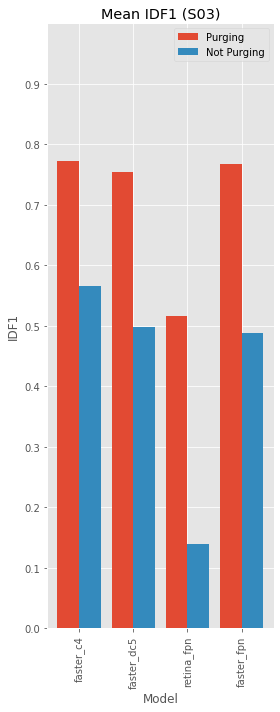

In [76]:
plotx = np.arange(len(models))

plt.figure(figsize=(4, 10))
plt.style.use("ggplot")

plt.title("Mean IDF1 (S03)")
plt.xlabel("Model")
plt.ylabel("IDF1")
plt.xticks(ticks=plotx, labels=models, rotation=90)
plt.yticks(ticks=np.arange(0.0, 1.0, 0.1))
plt.ylim((0.0, 1.0))

plt.bar(x=plotx - 0.2, height=purging, width=0.4, label="Purging")
plt.bar(x=plotx + 0.2, height=not_purging, width=0.4, label="Not Purging")
plt.legend()
plt.tight_layout()
plt.savefig("./plots/t2_meanidf1s03.png")
plt.show()
plt.close()

In [66]:
purging = np.asarray([
    test_s03[np.logical_and(test_s03["model"] == mod, test_s03["purge"] == True)]["precision"].mean() for mod in models
])

not_purging = np.asarray([
    test_s03[np.logical_and(test_s03["model"] == mod, test_s03["purge"] == False)]["precision"].mean() for mod in models
])

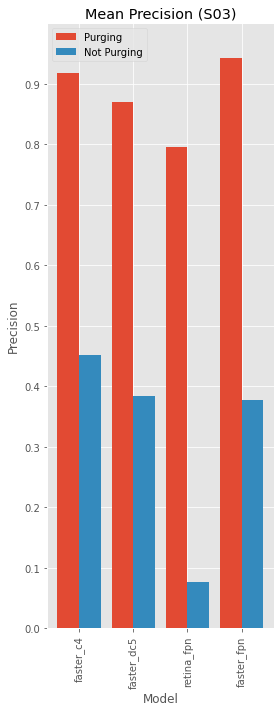

In [67]:
plotx = np.arange(len(models))

plt.figure(figsize=(4, 10))
plt.style.use("ggplot")

plt.title("Mean Precision (S03)")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.xticks(ticks=plotx, labels=models, rotation=90)
plt.yticks(ticks=np.arange(0.0, 1.0, 0.1))
plt.ylim((0.0, 1.0))

plt.bar(x=plotx - 0.2, height=purging, width=0.4, label="Purging")
plt.bar(x=plotx + 0.2, height=not_purging, width=0.4, label="Not Purging")
plt.legend()
plt.tight_layout()
plt.savefig("./plots/t2_meanprecs03.png")
plt.show()
plt.close()

In [102]:
purging = np.asarray([
    test_s03[np.logical_and(test_s03["model"] == mod, test_s03["purge"] == True)]["recall"].mean() for mod in models
])

not_purging = np.asarray([
    test_s03[np.logical_and(test_s03["model"] == mod, test_s03["purge"] == False)]["recall"].mean() for mod in models
])

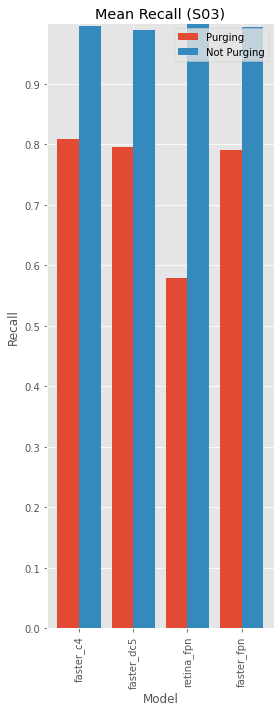

In [103]:
plotx = np.arange(len(models))

plt.figure(figsize=(4, 10))
plt.style.use("ggplot")

plt.title("Mean Recall (S03)")
plt.xlabel("Model")
plt.ylabel("Recall")
plt.xticks(ticks=plotx, labels=models, rotation=90)
plt.yticks(ticks=np.arange(0.0, 1.0, 0.1))
plt.ylim((0.0, 1.0))

plt.bar(x=plotx - 0.2, height=purging, width=0.4, label="Purging")
plt.bar(x=plotx + 0.2, height=not_purging, width=0.4, label="Not Purging")
plt.legend()
plt.tight_layout()
plt.savefig("./plots/t2_meanrec03.png")
plt.show()
plt.close()

In [104]:
no_purge = test_s03[np.logical_and(test_s03["model"] == "faster_c4", test_s03["purge"] == False)].sort_values("cam")
purge = test_s03[np.logical_and(test_s03["model"] == "faster_c4", test_s03["purge"] == True)].sort_values("cam")

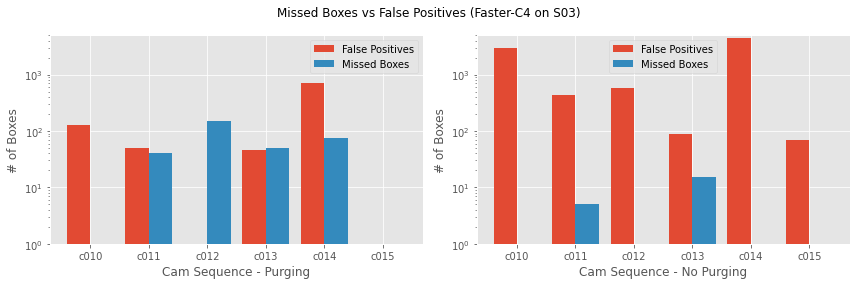

In [109]:
plotx = np.arange(len(purge["cam"]))

plt.figure(figsize=(12, 4))
plt.style.use("ggplot")

plt.suptitle("Missed Boxes vs False Positives (Faster-C4 on S03)")

plt.subplot(1, 2, 1)

plt.xlabel("Cam Sequence - Purging")
plt.ylabel("# of Boxes")
plt.xticks(ticks=plotx, labels=purge["cam"])
plt.bar(x=plotx - 0.2, height=purge["num_false_positives"], width=0.4, label="False Positives")
plt.bar(x=plotx + 0.2, height=purge["num_misses"], width=0.4, label="Missed Boxes")
plt.yscale("log")
plt.ylim((1, 5000))
plt.legend()
plt.tight_layout()

plt.subplot(1, 2, 2)

plt.xlabel("Cam Sequence - No Purging")
plt.ylabel("# of Boxes")
plt.xticks(ticks=plotx, labels=no_purge["cam"])
plt.bar(x=plotx - 0.2, height=no_purge["num_false_positives"], width=0.4, label="False Positives")
plt.bar(x=plotx + 0.2, height=no_purge["num_misses"], width=0.4, label="Missed Boxes")
plt.yscale("log")
plt.ylim((1, 5000))
plt.legend()
plt.tight_layout()

plt.savefig("./plots/t2_misses.png")
plt.show()
plt.close()

In [116]:
res_s03 = test_s03[np.logical_and(test_s03["model"] == "faster_c4", test_s03["purge"] == True)].sort_values("cam")[["cam","idf1"]].T
res_s03

,0,0,0,0,0,0
cam,c010,c011,c012,c013,c014,c015
idf1,0.966918,0.913212,0.0,0.926049,0.825138,1.0


In [118]:
res_s03.T["idf1"].mean()

0.7718861783508012

In [119]:
res_s01 = test_s01[np.logical_and(test_s01["model"] == "faster_c4", test_s01["purge"] == True)].sort_values("cam")[["cam","idf1"]].T
res_s01

,0,0,0,0,0
cam,c001,c002,c003,c004,c005
idf1,0.700722,0.688337,0.718969,0.810551,0.595813


In [120]:
res_s01.T["idf1"].mean()

0.7028783533063232

AttributeError: module 'pandas' has no attribute 'style'

In [137]:
res_s04 = test_s04[np.logical_and(test_s04["model"] == "faster_c4", test_s04["purge"] == True)].sort_values("cam")[
    ["cam", "idf1"]].T
res_s04.to_csv("./results/sec04.csv")
res_s04

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cam,c016,c017,c018,c019,c020,c021,c022,c023,c024,c025,...,c031,c032,c033,c034,c035,c036,c037,c038,c039,c040
idf1,0.8,0.776423,0.944251,0.879056,0.880416,0.989011,0.916743,0.945869,0.0,0.892704,...,0.0,0.892365,0.822482,0.68254,0.822707,0.371269,0.477007,0.806164,0.875622,0.551786


In [136]:
res_s04.T["idf1"].mean()

0.7334618311778818